# 서포트 벡터 머신

## Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('figure', figsize=(12, 8))

from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

In [ ]:
pip install mglearn

In [ ]:
import mglearn

## Support Vector Machine

### SVM 기원과 원리
* A묶음과 B묶음이 있을 때, 그를 구분하는 선을 그어야 한다.  
그런데 선을 A에 가까이에 그었다고 하자. 그래도 A와 B는 잘 나눴다.  

* 그러나 그렇게 치우쳐져 있으면 새로운 데이터가 들어왔을 때 overfitting이 일어나게 된다.  
즉, 우리는 딱 A와 B 사이에 공평하게 존재하는 선을 찾아야 한다.  

* SVM은 찾을 선을 매우 굵게 그어서 이 문제를 해결했다. 어디에도 치우치지 않게 아예 굵게 그어버린 것이다..  
마치 A, B 두 묶음을 원이라고 할 때, 두 원에 접하는 굵은 선을 그은 것처럼.  

* 자, 이번엔 두 묶음을 3차원 상의 두 면이라고 생각해보자.  
우리는 그 두 면 사이에 같은 거리에 위치하는 하나의 면을 찾아야 한다.  

* A, B 두 면은 원점으로 부터 나온 법선 벡터로 표현될 수 있다.(기하와 벡터)  
이 두 법선 벡터 값을 이용해 최적의 사이 면을 찾으면 된다.  
이 두 법선 벡터가 위 작업을 하는데 도움을 준다고 해서 Support Vector라는 이름이 붙은 거다.  

* 참고자료: [SVM](https://hleecaster.com/ml-svm-concept/)
  
---

### Hyperparameter: C: 얼마나 빡세게 잡을 것이냐? - Soft Margin, Hard Margin
* 다시 A, B 두 원의 관점으로 보자.  
A, B 두 원에 접하게 굵은 선을 그어야 하는데, A, B 최외곽에 속한 값이 이상치라면 원의 크기가 과하게 커져버릴 수 있다.

* 요놈 때문에 직선의 굵기가 쓸데 없이 너무 얇아져 버릴 수가 있다.  
이때, 이 특이한 놈을 특이값 아니야? 라고 의심하고 무시해서 선을 굵게 그어버리는 게 Soft Margin이고,  
엄격하게 적용해서 선을 얇게 긋는 것이 Hard Margin이라고 한다.  

* 얼마나 빡세게 잡을 것이냐!가 바로 SVM의 hyperparameter C 값이다!  
C값을 크게 주면 엄격하게 Hard하게 하고, 작게 주면 유하게 Soft하게 선을 긋는다.  
* **C값이 크면 overfitting이 일어날 수 있다.  
C값을 바꿔가면서 적정한 C값을 찾는 것이 보편적이다.**

### 선형 모델과 비선형 특성

#### 데이터 생성

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=123)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

#### 선형 SVM (SVC)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


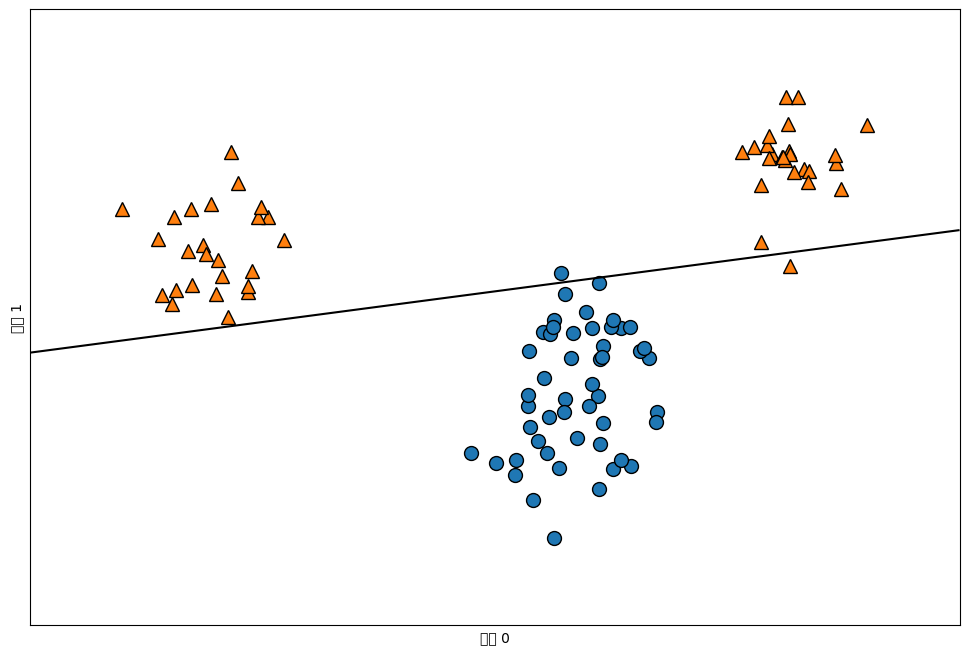

In [ ]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=5000, tol=1e-3).fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

#### 비선형 SVM

<ipython-input-8-6be397906040>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
<ipython-input-8-6be397906040>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',


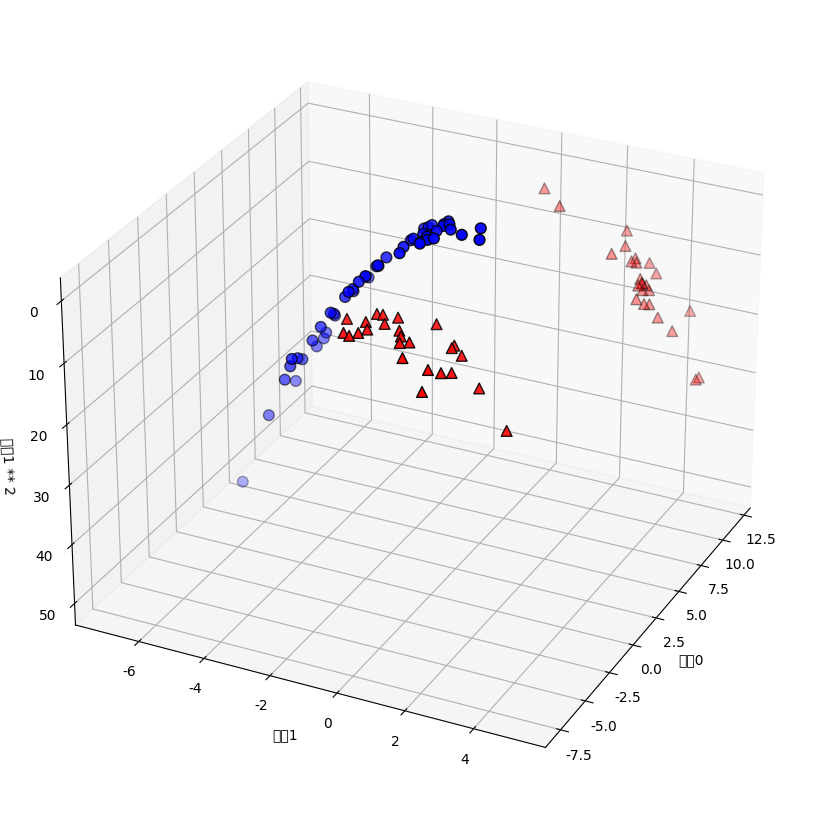

In [ ]:
# 두 번째 특성을 제곱하여 추가합니다
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
# Axes3D가 자동으로 그림에 추가되는 방식은 matplotlib 3.4 버전에서 deprecated 되었습니다.
# 이와 관련된 경고를 피하려면 auto_add_to_figure=False로 지정하고 figure.add_axes(ax)로 직접 추가하세요.
ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
figure.add_axes(ax)
# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그립니다
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel('특성0')
ax.set_ylabel('특성1')
ax.set_zlabel('특성1 ** 2')
plt.show()

<ipython-input-9-dfd1e2ae9492>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
<ipython-input-9-dfd1e2ae9492>:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


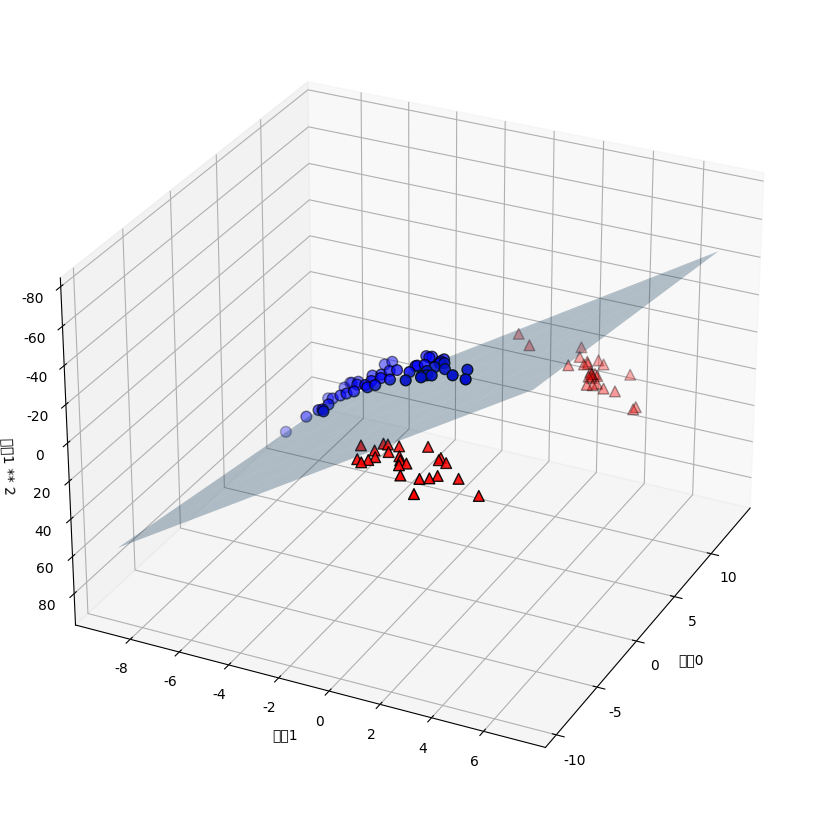

In [ ]:
linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
# Axes3D가 자동으로 그림에 추가되는 방식은 matplotlib 3.4 버전에서 deprecated됩니다.
# 이와 관련된 경고를 피하려면 auto_add_to_figure=False로 지정하고 figure.add_axes(ax)로 직접 추가하세요.
ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
figure.add_axes(ax)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel('특성0')
ax.set_ylabel('특성1')
ax.set_zlabel('특성1 ** 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


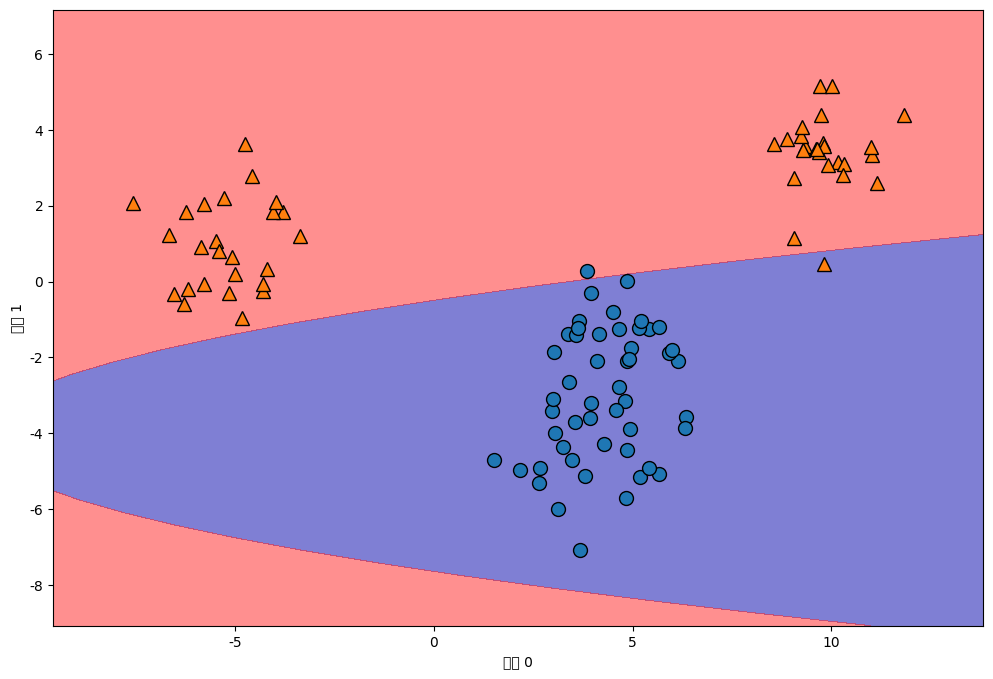

In [ ]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

### 커널 서포트 벡터 머신
* x1, x2로 2차원 상태이고, 두 데이터가 도넛 모양으로 x1은 원점 가까이에 원형으로, x2는 더 멀리에 원형으로 분포되어 있다.  
이 경우 둘을 구분하는 직선을 그을 수 없다.  

* 따라서 우리는 각 데이터를 제곱한 x3이라는 column을 하나 더 만들어 3차원으로 만들어 버린다.  
원점에 가까운 x1들은 제곱하면 매우 작을 것이고, 비교적 원점에서 멀어 값이 좀 있던 x2들은 더 커진다.  

* 3차원 그래프에서 x1은 여전히 원점에 가까운 평면이고, x2는 x3축 방향으로 올라온 평면에 위치한다.  
이제 두 평면을 나누는 선(면)을 그을 수 있다.  
그은 면을 2차원으로 표시하니 도넛 사이에 원을 그린 것이 된다.  

* Polynomial Regression 때처럼 선형 방정식이나, x3는 사실 x^2의 의미이다.  
알고리즘은 바뀌지 않았으나 데이터를 변환시켜 꼼수 쓴 점에서 Polynomial Regression과 비슷하다.   

* 하지만, 선형회귀의 경사하강법 때처럼 x3, x4...너무 많아지면 그을 임의의 직선과 각 점들 사이의 거리를 통해 계산하여 직선 방정식을 찾는게 너무 어려워진다.  
원래는 (x1-x)^2+(x2-x)^2....다 해야하는데, 이거랑 같은 결과가 나오는 다른 방정식을 쓰는 것으로 꼼수쓴다.  
그 방정식에는 x1, x2만 넣으면 된다.  
이걸 커널 기법이라고 한다.  

---

* 이 중 가우시안 커널 기법에서는 Hyperparameter가 gamma이다.  **SVM의 default는 가우시안 커널 기법이다**  

* gamma가 크면 더 구불구불 고차원으로 계산을 한다(C, Polynomial Regression처럼). 더 정교하지만 overfitting이 일어날 수 있다.  

* Ridge와 Lasso에서 람다를 통해 규제를 줘서 w를 확 줄여 구불구불을 줄이는 것과 반대이다.  
람다는 얼마나 대충 그릴지를 정의하는 변수이다.

* **생각해보니 regression 계열은 하이퍼 파라미터가 클 수록 규제가 강해 구불구불 그리는 것이고,  
Classification은 클수록 대충 그리는 것 같다.**  
* ** Logistic Regression은 Classification이지만 Regressor이므로 C값이 클수록 구불구불하게 그린다.**
* **단, regression에서 규제(ridge, lasso, elasticNet)는 하이퍼 파라미터가 클수록 러프하게 그리는 것이다.**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


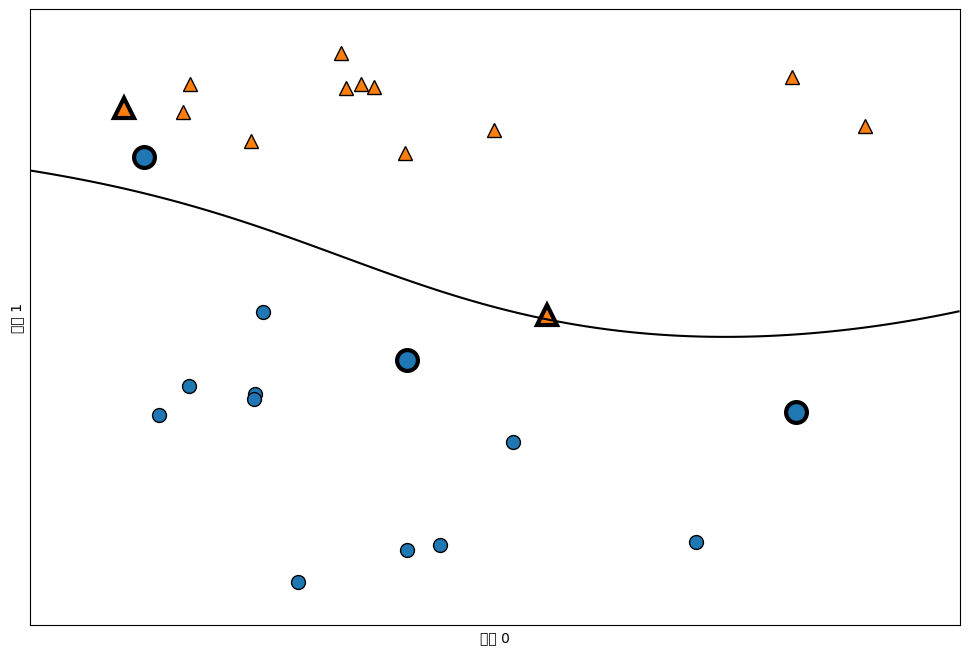

In [ ]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# 서포트 벡터
sv = svm.support_vectors_
# dual_coef_ 의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

#### SVM 매개변수 튜닝

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

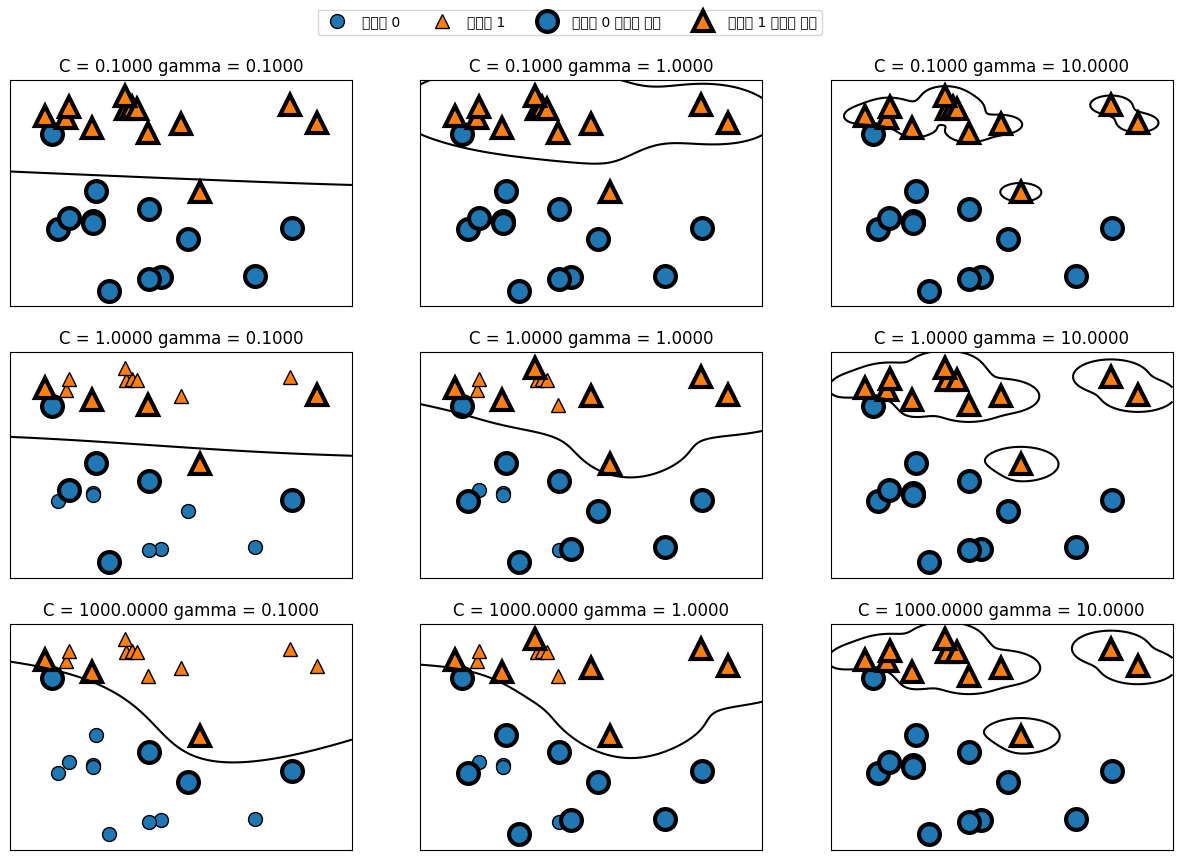

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(['클래스 0', '클래스 1', '클래스 0 서포트 벡터', '클래스 1 서포트 벡터'], ncol=4, loc=(.9, 1.2))
plt.show()

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=123)

svc = SVC()
svc.fit(X_train, y_train)

print('훈련 세트 정확도: {:.2f}'.format(svc.score(X_train, y_train)))
print('테스트 세트 정확도: {:.2f}'.format(svc.score(X_test, y_test)))

훈련 세트 정확도: 0.90
테스트 세트 정확도: 0.92


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47197 (\N{HANGUL SYLLABLE ROG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

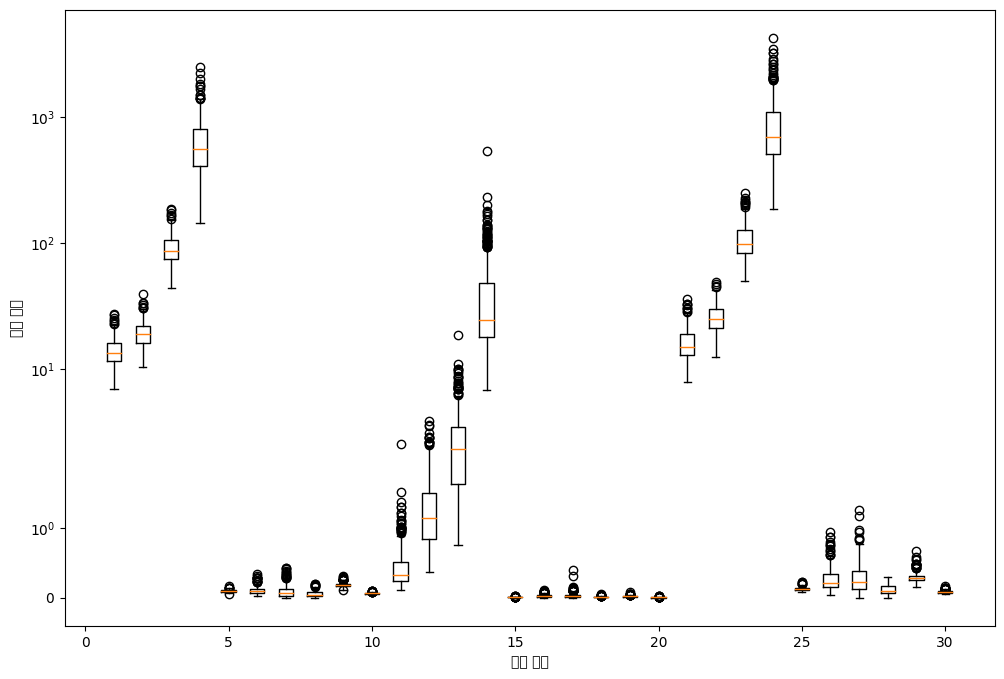

In [ ]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale('symlog')
plt.xlabel('특성 목록')
plt.ylabel('특성 크기')
plt.show()

#### SVM 을 위한 데이터 전처리

In [ ]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0 최댓값은 1 임
X_train_scaled = (X_train - min_on_training) / range_on_training
print('특성별 최솟값\n', X_train_scaled.min(axis=0))
print('특성별 최댓값\n', X_train_scaled.max(axis=0))

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [ ]:
# 테스트 세트에도 같은 작업을 적용하지만
# 훈련 세트에서 계산한 최솟값과 범위를 사용합니다(자세한 내용은 3장에 있습니다)
X_test_scaled = (X_test - min_on_training) / range_on_training

In [ ]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print('훈련 세트 정확도: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.981
테스트 세트 정확도: 0.986
